# Recurrent Neural Network

In [111]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
import torch.optim as optim 
from torch.utils.data import Dataset, DataLoader

In [113]:
def set_seed(seed):
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    return "Done"

set_seed(42)

'Done'

# Basic Knowledge

In [114]:
# ╔══════════════════════════╦═══════════════════════════════╦════════════════════╦═════════════════════════╗
# ║        Data type         ║             dtype             ║     CPU tensor     ║       GPU tensor        ║
# ╠══════════════════════════╬═══════════════════════════════╬════════════════════╬═════════════════════════╣
# ║ 32-bit floating point    ║ torch.float32 or torch.float  ║ torch.FloatTensor  ║ torch.cuda.FloatTensor  ║
# ║ 64-bit floating point    ║ torch.float64 or torch.double ║ torch.DoubleTensor ║ torch.cuda.DoubleTensor ║
# ║ 16-bit floating point    ║ torch.float16 or torch.half   ║ torch.HalfTensor   ║ torch.cuda.HalfTensor   ║
# ║ 8-bit integer (unsigned) ║ torch.uint8                   ║ torch.ByteTensor   ║ torch.cuda.ByteTensor   ║
# ║ 8-bit integer (signed)   ║ torch.int8                    ║ torch.CharTensor   ║ torch.cuda.CharTensor   ║
# ║ 16-bit integer (signed)  ║ torch.int16 or torch.short    ║ torch.ShortTensor  ║ torch.cuda.ShortTensor  ║
# ║ 32-bit integer (signed)  ║ torch.int32 or torch.int      ║ torch.IntTensor    ║ torch.cuda.IntTensor    ║
# ║ 64-bit integer (signed)  ║ torch.int64 or torch.long     ║ torch.LongTensor   ║ torch.cuda.LongTensor   ║
# ║ Boolean                  ║ torch.bool                    ║ torch.BoolTensor   ║ torch.cuda.BoolTensor   ║
# ╚══════════════════════════╩═══════════════════════════════╩════════════════════╩═════════════════════════╝

In [115]:
# RNN 
 # Input data: RNN should have 3 dimensions. (Batch Size, Sequence Length and Input Dimension)
 # If we don't initialize the hidden layer, it will be auto-initiliased by PyTorch to be all zeros
 # NO need to set hidden or chnage it as it will be automatically done by pytorch 
 # V.Imp to concentrate on shapes of input, output and hidden.
 # Ouput can be drawn from hidden and output hidden is the last stage of 
    
    
# hidden size we can define as 32, 64, 128 (again better in 2’s power) and 
# input size is a number of features in our data (input dimension). 
# Here input size is 2 for data type 2 and 1 for data type 1.

In [116]:
array = np.linspace(0,119,120)
print(array)

[  0.   1.   2.   3.   4.   5.   6.   7.   8.   9.  10.  11.  12.  13.
  14.  15.  16.  17.  18.  19.  20.  21.  22.  23.  24.  25.  26.  27.
  28.  29.  30.  31.  32.  33.  34.  35.  36.  37.  38.  39.  40.  41.
  42.  43.  44.  45.  46.  47.  48.  49.  50.  51.  52.  53.  54.  55.
  56.  57.  58.  59.  60.  61.  62.  63.  64.  65.  66.  67.  68.  69.
  70.  71.  72.  73.  74.  75.  76.  77.  78.  79.  80.  81.  82.  83.
  84.  85.  86.  87.  88.  89.  90.  91.  92.  93.  94.  95.  96.  97.
  98.  99. 100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111.
 112. 113. 114. 115. 116. 117. 118. 119.]


In [117]:
test_size = 20
train_set = array[:-test_size]
test_set = array[-test_size:]

In [118]:
print(train_set)

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]


In [119]:
print(test_set)

[100. 101. 102. 103. 104. 105. 106. 107. 108. 109. 110. 111. 112. 113.
 114. 115. 116. 117. 118. 119.]


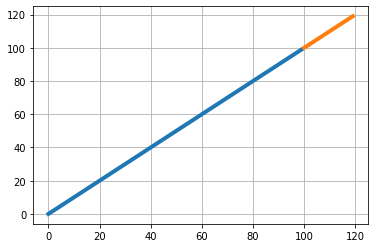

In [120]:
plt.plot(train_set,linewidth=4)
plt.grid(True)
plt.plot(test_set,range(100,120),linewidth=4)

# Create Input Data

In [121]:
def input_data(data,ws):
    out = []
    
    for i in range(len(data)-ws):
        feature = data[i:i+ws+1]
        out.append(feature)
        
    df = pd.DataFrame(out)
    return df

In [122]:
class CustomDatasetTrain(Dataset):
    def __init__(self):
        self.df = input_data(train_set,3)
        self.x = torch.from_numpy(self.df.drop(3,axis=1).to_numpy()).float()
        self.y = torch.from_numpy(self.df[3].to_numpy()).float()
        self.n_sample = self.df.shape[0]

    def __getitem__(self, index):
        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.n_sample
    
train_data= CustomDatasetTrain()

In [123]:
class CustomDatasetTest(Dataset):
    def __init__(self):
        self.df = input_data(test_set,3)
        self.x = torch.from_numpy(self.df.drop(3,axis=1).to_numpy()).float()
        self.y = torch.from_numpy(self.df[3].to_numpy()).float()
        self.n_sample = self.df.shape[0]

    def __getitem__(self, index):
        return self.x[index],self.y[index]
    
    def __len__(self):
        return self.n_sample
    
test_data = CustomDatasetTest()

In [124]:
train_loader = DataLoader(train_data,4,True)
test_loader = DataLoader(test_data,4)

In [125]:
for data in train_loader:
    print(data[0].reshape(-1,3,1))
    print(data)
    break

tensor([[[85.],
         [86.],
         [87.]],

        [[38.],
         [39.],
         [40.]],

        [[53.],
         [54.],
         [55.]],

        [[22.],
         [23.],
         [24.]]])
[tensor([[85., 86., 87.],
        [38., 39., 40.],
        [53., 54., 55.],
        [22., 23., 24.]]), tensor([88., 41., 56., 25.])]


# Model Train and Evaluate 

In [126]:
class RNN(nn.Module):
    def __init__(self,input_size, hidden_size, num_layers, linear_output, batch_size, bidirectional, batch_first):
        super().__init__()
        
        self.rnn = nn.RNN(input_size = input_size, 
                          hidden_size = hidden_size, 
                          num_layers = num_layers,
                          batch_first= batch_first,
                          bidirectional = bidirectional)
        
        self.linear = nn.Linear(hidden_size,12)
        self.linear_1 = nn.Linear(12,1)
    
    def forward(self,input_data):
        input_ = input_data.reshape(-1,3,1)
        output, hidden = self.rnn(input_)
        pred = self.linear(hidden)
        pred = self.linear_1(pred)
        return pred 

In [137]:
batch_size = 5

train_loader = DataLoader(train_data,batch_size)
test_loader = DataLoader(test_data,batch_size)

model = RNN(input_size = 1,
            hidden_size =100,
            num_layers = 1,
            linear_output = 1,
            batch_size= batch_size,
            bidirectional= False,
            batch_first= True)


loss_func = nn.MSELoss()
optimizer = torch.optim.Adagrad(model.parameters(),lr=0.09)

In [138]:
print(model)

RNN(
  (rnn): RNN(1, 100, batch_first=True)
  (linear): Linear(in_features=100, out_features=12, bias=True)
  (linear_1): Linear(in_features=12, out_features=1, bias=True)
)


In [139]:
for i in model.parameters():
    print(i.shape)

torch.Size([100, 1])
torch.Size([100, 100])
torch.Size([100])
torch.Size([100])
torch.Size([12, 100])
torch.Size([12])
torch.Size([1, 12])
torch.Size([1])


In [140]:
epochs = 200
loss = 0

for epoch in range(epochs):
    for data,label in train_loader:
        optimizer.zero_grad()
        hidden = zero
        pred = model.forward(data)
        loss = loss_func(pred,label.reshape(1,-1,1))
        loss.backward()
        
        optimizer.step()
    print(loss.item())

161.92579650878906
110.2999267578125
143.57830810546875
24.5831298828125
32.62636947631836
107.24241638183594
15.240361213684082
0.3071672022342682
37.207332611083984
15.746075630187988
29.832117080688477
3.466341733932495
0.38343673944473267
59.52093505859375
1.230486273765564
7.359494209289551
10.21453857421875
30.385883331298828
5.926243782043457
5.44651985168457
47.926116943359375
18.690963745117188
15.12387466430664
18.558208465576172
17.819072723388672
0.15553048253059387
4.775747299194336
2.233306407928467
71.61139678955078
7.333754062652588
0.9103363156318665
10.9636812210083
7.71054744720459
19.396183013916016
7.7566962242126465
8.142659187316895
5.764492988586426
12.255504608154297
23.668621063232422
3.728449821472168
2.2953920364379883
1.6740994453430176
2.0437822341918945
0.4515063166618347
0.6242112517356873
7.944490432739258
3.040931224822998
1.8792681694030762
0.7977392673492432
0.3456093966960907
0.06630631536245346
0.3419574201107025
0.16080504655838013
0.0259551052004

# Evaluation Stage

In [141]:
model.eval()
loss = 0
batch = 0
original = []
predi = []
with torch.no_grad():
    for data, label in test_loader:
        pred = model.forward(data)
        original.extend(label.tolist())
        predi.extend(pred[0].reshape(1,-1).tolist())
        loss += loss_func(pred,label.reshape(1,-1,1))
        print(label,pred)
        batch+=1
        
    print(f"Loss : {loss/batch}")
    

tensor([103., 104., 105., 106., 107.]) tensor([[[101.7332],
         [102.2446],
         [102.7857],
         [103.4350],
         [104.2936]]])
tensor([108., 109., 110., 111., 112.]) tensor([[[105.4225],
         [106.7463],
         [108.0613],
         [109.2003],
         [110.1331]]])
tensor([113., 114., 115., 116., 117.]) tensor([[[110.9144],
         [111.6123],
         [112.2879],
         [112.9957],
         [113.7799]]])
tensor([118., 119.]) tensor([[[114.6622],
         [115.6339]]])
Loss : 6.933938026428223


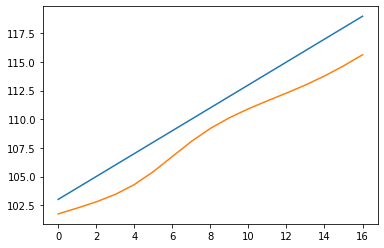

In [142]:
test = []
for i in predi:
    test.extend(i)

# test = [int(i) for i in test]
plt.plot(original)
plt.plot(test)

In [109]:
rnn = nn.RNN(1, 1, 1)
input = torch.randn(3, 2, 1)
h0 = torch.randn(1, 2, 1)
output, hn = rnn(input, h0)

In [110]:
output

tensor([[[ 0.6909],
         [ 0.2875]],

        [[-0.1474],
         [ 0.3286]],

        [[ 0.8925],
         [ 0.7877]]], grad_fn=<StackBackward0>)

In [413]:
hn

tensor([[[0.9727],
         [0.9349]]], grad_fn=<StackBackward0>)